# Decision Tree
## Importing necessary libraries

In [658]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## Importing data

In [659]:
df=pd.read_csv("tennis.csv")
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


## Shape of data

In [660]:
df.shape

(14, 5)

## LabelEncoding

In [661]:
labelencoder=LabelEncoder()
encoded_df=df.apply(labelencoder.fit_transform)     #LabelEncoder takes only 1d array like element
                                                    #to transform 2d array lilke structure we used apply method for each column
encoded_df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


## Seperating Feature/Independent variable and Target/Dependent variable

In [662]:
encoded_df.columns
# outlook, temp, humidity, windy are feature variables and play is targt variable

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [663]:
x=encoded_df.iloc[:,:4]
y=encoded_df.iloc[:,4]

In [664]:
x.head()

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [665]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: play, dtype: int32

## Splitting Training and Testing Data

In [666]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.36,random_state=3)

## Decision Tree model training 
### By Entropy Criterion

In [667]:
classifier1=DecisionTreeClassifier(criterion="entropy")
classifier1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

#### prediction

In [668]:
y_pred=classifier1.predict(x_test)

#### Accuracy score

In [676]:
accuracy_score(y_test,y_pred)

0.6666666666666666

### By gini Criterion ie by default criterion

In [670]:
classifier2=DecisionTreeClassifier()
classifier2.fit(x_train,y_train)

DecisionTreeClassifier()

#### prediction

In [671]:
y_pred=classifier2.predict(x_test)

#### Accuracy score

In [672]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [673]:
confusion_matrix(y_test,y_pred)

array([[1, 2],
       [0, 3]], dtype=int64)

## Tree ploting

[Text(0.5, 0.9, 'x[1] <= 1.5\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.41666666666666663, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.5, 'x[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.3, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5833333333333333, 0.8, '  False')]

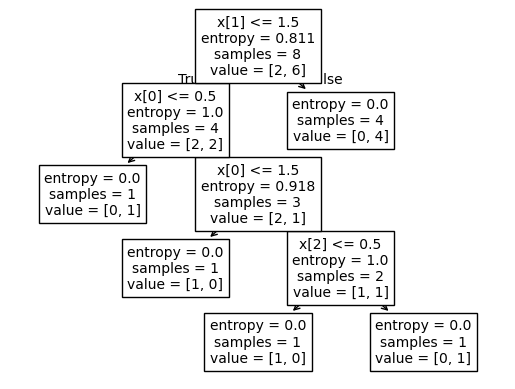

In [674]:
#fig,axes=plt.subplot(nrows=1,ncols=1,figsize=(4,4),dpi=100)
tree.plot_tree(classifier1)

[Text(0.6, 0.9, 'x[1] <= 1.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.4, 0.7, 'x[0] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5, 0.8, 'True  '),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'x[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.3, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.8, '  False')]

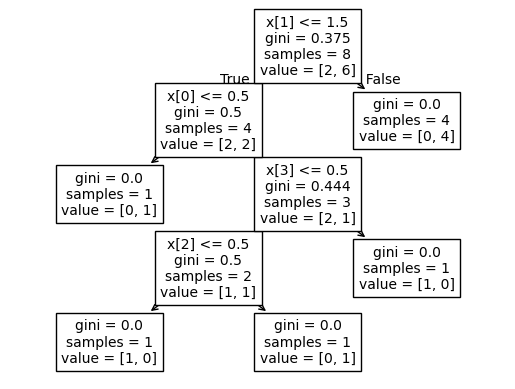

In [675]:
#fig,axes=plt.subplot(nrows=1,ncols=1,figsize=(4,4),dpi=100)
tree.plot_tree(classifier2)